In [1]:
import json
import pandas as pd
from scipy import stats
import numpy as np

PROJECT = 'next'

In [2]:
f = open(f'../report/DATA_JSON/{PROJECT}.json')
raw = json.loads(f.read())
f.close()

In [3]:
C_DICT = {}

for data in raw.values():
    for file_name, file_data in data.items():
        # print(file_name)
        file_name = file_name.split('input_dataset/')[-1]
        num_c = 0
        for level, amount in file_data['Levels'].items():
            if level == 'C2':
                num_c += amount
        if num_c != 0:
            C_DICT[file_name] = num_c

print(C_DICT)

{}


In [4]:
sorted_c_dict = sorted(C_DICT.items(), key=lambda x: x[1], reverse=True)
sorted_c_dict = dict(sorted_c_dict)

In [5]:
df = pd.DataFrame(sorted_c_dict.items(), columns=['Filename', 'Amount of C2'])


In [6]:
pd.set_option('max_colwidth', 400)
df.head(10)

,Filename,Amount of C2


In [7]:
NUM_FILES = {
    'A1': 0,
    'A2': 0,
    'B1': 0,
    'B2': 0,
    'C1': 0,
    'C2': 0,
}
NUM_COMP = {
    'A1': 0,
    'A2': 0,
    'B1': 0,
    'B2': 0,
    'C1': 0,
    'C2': 0,
}

for data in raw.values():
    for file_name, file_data in data.items():
        FILE_STATUS = {
            'A1': False,
            'A2': False,
            'B1': False,
            'B2': False,
            'C1': False,
            'C2': False,
        }
        for level, amount in file_data['Levels'].items():
            FILE_STATUS[level] = True
            NUM_COMP[level] += amount
        for level, status in FILE_STATUS.items():
            if status:
                NUM_FILES[level] += 1

COMPETENCY = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']

df_num = pd.DataFrame({'Competency': COMPETENCY, 'Number of Code Construct': NUM_COMP.values(), 'Number of Files': NUM_FILES.values()})


In [8]:
df_num

,Competency,Number of Code Construct,Number of Files
0,A1,113685,4746
1,A2,28847,3991
2,B1,69880,4794
3,B2,14396,1201
4,C1,562,94
5,C2,0,0


In [9]:
# Calc competency for each file

LEVEL_TO_NUM = {
    'A1': 1,
    'A2': 2,
    'B1': 3,
    'B2': 4,
    'C1': 5,
    'C2': 6,
}

weight_dict = {}

for data in raw.values():
    for file_name, file_data in data.items():
        file_lv = 0
        amount_construct = 0
        for level, amount in file_data['Levels'].items():
            file_lv = max(file_lv, LEVEL_TO_NUM[level])
        #     file_lv += LEVEL_TO_NUM[level] * amount
        #     amount_construct += amount
        # file_lv /= amount_construct
        # print(f'{file_name}: {file_lv}')
        weight_dict[file_name] = file_lv

sorted_weight_dict = sorted(weight_dict.items(), key=lambda x: x[1], reverse=True)
sorted_weight_dict = dict(sorted_weight_dict)


df_weighted = pd.DataFrame(sorted_weight_dict.items(), columns=['Filename', 'Weighted Competency'])


In [10]:
df_weighted.head(50)

,Filename,Weighted Competency
0,input_dataset/next/scripts/update-google-fonts.js,5
1,input_dataset/next/test/e2e/middleware-request-header-overrides/app/middleware.js,5
2,input_dataset/next/test/e2e/new-link-behavior/stitches/stitches.config.js,5
3,input_dataset/next/test/e2e/new-link-behavior/material-ui/pages/_app.js,5
4,input_dataset/next/test/e2e/404-page-router/app/components/debug-error.js,5
5,input_dataset/next/test/e2e/404-page-router/app/components/debug.js,5
6,input_dataset/next/test/e2e/app-dir/app-external/pages/test-pages-esm.jsx,5
7,input_dataset/next/test/e2e/app-dir/app-external/node_modules_bak/non-isomorphic-text/index.js,5
8,input_dataset/next/test/e2e/app-dir/app-external/app/external-imports/client/page.js,5
9,input_dataset/next/test/e2e/app-dir/app-external/app/esm/client/page.js,5


In [11]:
FILE_DEPTH = []
DEPTH_COMP = []

for name, data in weight_dict.items():
    FILE_DEPTH.append(len(name.split('/')) - 2)
    DEPTH_COMP.append(data)

print(FILE_DEPTH)

[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 4, 3, 5, 4, 5, 6, 4, 3, 3, 3, 3, 3, 3, 3, 5, 4, 5, 6, 3, 3, 3, 3, 3, 7, 7, 6, 5, 5, 7, 6, 8, 7, 6, 6, 6, 6, 5, 7, 7, 7, 7, 6, 6, 7, 7, 6, 6, 6, 7, 7, 6, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 7, 6, 5, 7, 7, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 4, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 5, 5, 6, 6, 6, 7, 7, 7, 6, 6, 6, 7, 7, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 7, 8, 8, 7, 8, 6, 6, 6, 7, 6, 6, 6, 6, 7, 7, 6, 7, 6, 6, 7, 7, 7, 7, 5, 6, 6, 5, 6, 5, 7, 7, 5, 7, 6, 6, 7, 7, 5, 6, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6, 8, 8, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 6, 6, 5, 6, 7, 7, 7, 6, 7, 7, 7, 6, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 7, 6, 9, 8, 7, 7, 7, 8, 8, 7, 8, 8, 8, 7, 7, 7, 7, 8, 8, 8, 8, 8, 7, 6, 7, 7, 8, 8, 8, 8, 8, 7, 6, 7, 7, 6, 

In [12]:
# if isMonotonic(dataset_1) and isMonotonic(dataset_2):
corr, p_val = stats.kendalltau(FILE_DEPTH, DEPTH_COMP)
# print("use Spearman correlation")
# print ("P-Value: ", p_val)
# print(f'corr = {corr}')
# else:
# corr, p_val = stats.spearmanr(dataset_1, dataset_2)
print("use Pearson correlation")
print("P-Value: ", p_val)
print(f'corr = {corr}')


use Pearson correlation
P-Value:  3.097716314686244e-14
corr = -0.09645937846624507


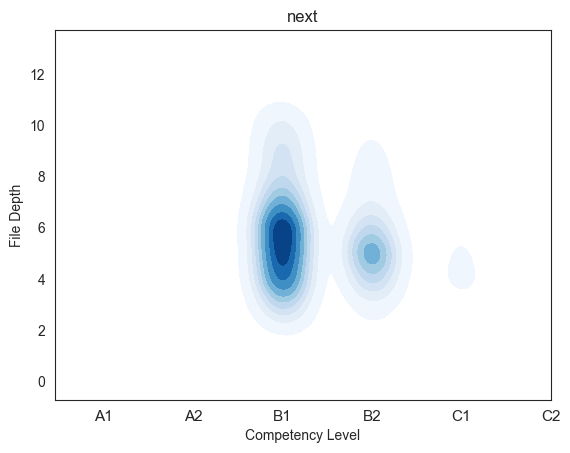

In [13]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

x = np.array(DEPTH_COMP)
y = np.array(FILE_DEPTH)

# set seaborn style
sns.set_style("white")

# Custom the color, add shade and bandwidth

figure, axe = plt.subplots()

sns.kdeplot(x=x, y=y, cmap="Blues", fill=True, bw_adjust=1.5)
axe.xaxis.set_ticks([1, 2, 3, 4, 5, 6])
axe.xaxis.set_ticklabels(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], fontsize=11)

# Add label
plt.xlabel('Competency Level')
plt.ylabel(f'File Depth')
title = 'sveltekit' if PROJECT == 'kit' else PROJECT
plt.title(title)


plt.show()


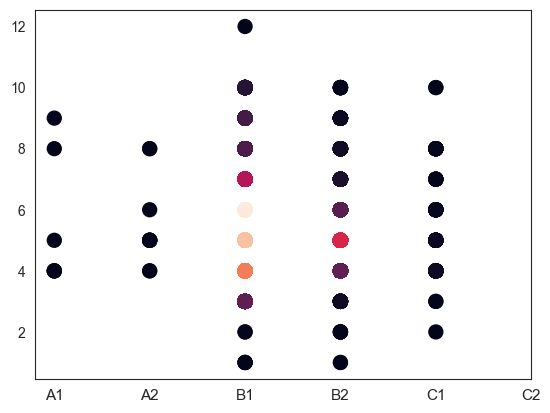

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

y = FILE_DEPTH
x = DEPTH_COMP

# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6])
ax.xaxis.set_ticklabels(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], fontsize=11)
plt.show()


In [15]:
FILE_NAMELENGTH = []
NAMELENGTH_COMP = []

for name, data in weight_dict.items():
    FILE_NAMELENGTH.append(len(name.split('/')[-1]))
    NAMELENGTH_COMP.append(data)


In [16]:
# if isMonotonic(dataset_1) and isMonotonic(dataset_2):
corr, p_val = stats.kendalltau(FILE_NAMELENGTH, NAMELENGTH_COMP)
# print("use Spearman correlation")
# print ("P-Value: ", p_val)
# print(f'corr = {corr}')
# else:
# corr, p_val = stats.spearmanr(dataset_1, dataset_2)
print("use Pearson correlation")
print("P-Value: ", p_val)
print(f'corr = {corr}')


use Pearson correlation
P-Value:  1.1013416427385198e-06
corr = 0.059756269350500366


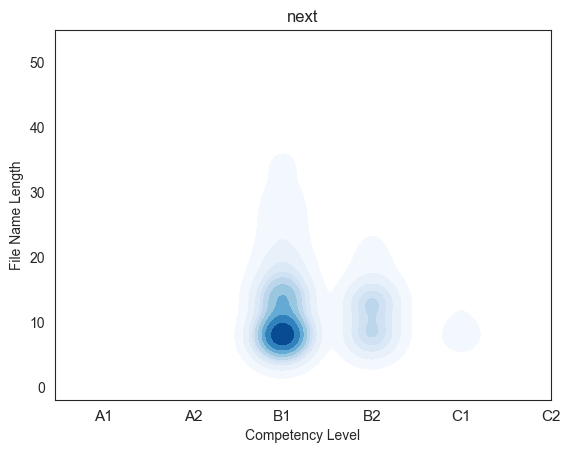

In [17]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

x = np.array(NAMELENGTH_COMP)
y = np.array(FILE_NAMELENGTH)

# set seaborn style
sns.set_style("white")

# Custom the color, add shade and bandwidth

figure, axe = plt.subplots()

sns.kdeplot(x=x, y=y, cmap="Blues", fill=True, bw_adjust=1.5)
axe.xaxis.set_ticks([1, 2, 3, 4, 5, 6])
axe.xaxis.set_ticklabels(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], fontsize=11)

# Add label
plt.xlabel('Competency Level')
plt.ylabel(f'File Name Length')
title = 'sveltekit' if PROJECT == 'kit' else PROJECT
plt.title(title)


plt.show()


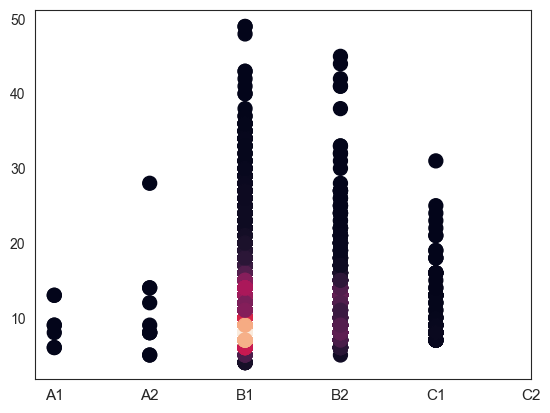

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

y = FILE_NAMELENGTH
x = NAMELENGTH_COMP

# Calculate the point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6])
ax.xaxis.set_ticklabels(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], fontsize=11)
plt.show()
